c:\Miniconda3\envs\env01\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Baseline Model Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Baseline AUC: 0.996031746031746

SMOTE Model Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

SMOTE AUC: 0.9927248677248677


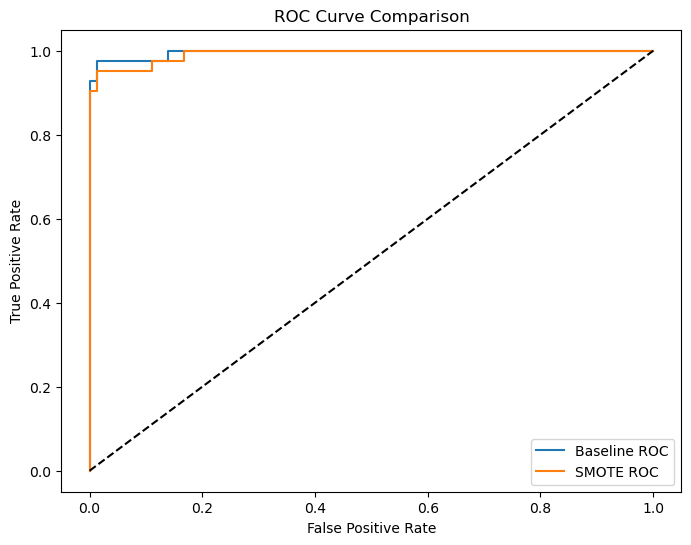

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = "breast-cancer-wisconsin-data_data.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"])

# Encode target variable
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline model without SMOTE
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_baseline = lr.predict(X_test_scaled)
y_prob_baseline = lr.predict_proba(X_test_scaled)[:, 1]

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Retrain model with SMOTE data
lr_smote = LogisticRegression(max_iter=500, random_state=42)
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = lr_smote.predict(X_test_scaled)
y_prob_smote = lr_smote.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Baseline Model Report:\n", classification_report(y_test, y_pred_baseline))
print("Baseline AUC:", roc_auc_score(y_test, y_prob_baseline))

print("\nSMOTE Model Report:\n", classification_report(y_test, y_pred_smote))
print("SMOTE AUC:", roc_auc_score(y_test, y_prob_smote))

# Confusion matrices
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
cm_smote = confusion_matrix(y_test, y_pred_smote)

# Plot ROC curves
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_baseline)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label="Baseline ROC")
plt.plot(fpr_smote, tpr_smote, label="SMOTE ROC")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [6]:
# --- Step 2: Decision Tree on SMOTE Data ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Decision Tree Classifier using SMOTE-balanced training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_dt = dt.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.9122807017543859
Confusion Matrix:
 [[67  5]
 [ 5 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        72
           1       0.88      0.88      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



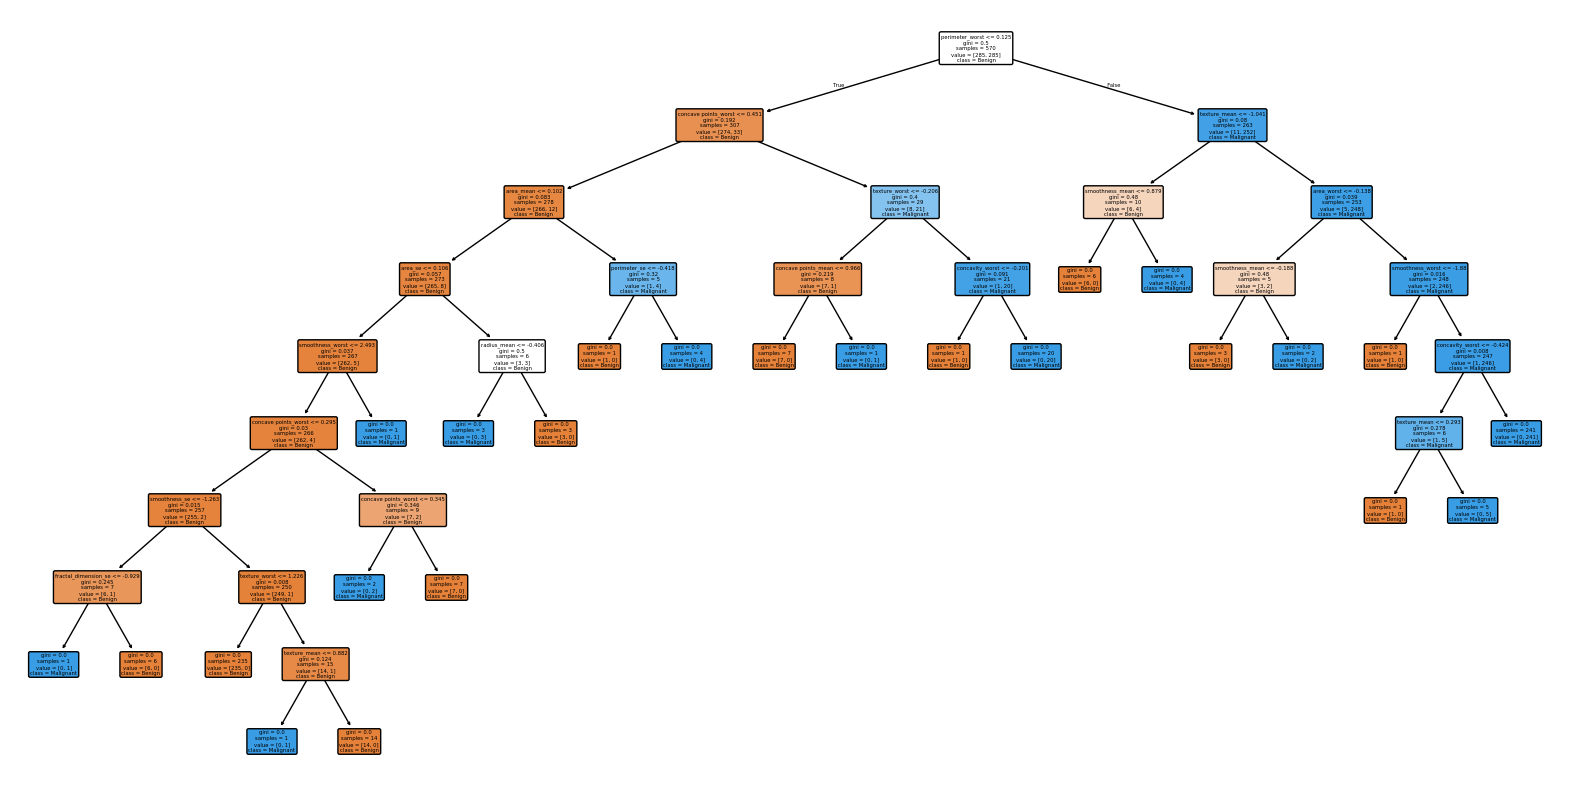

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["Benign", "Malignant"], filled=True, rounded=True)
plt.show()